IMPORT LIBRARY

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Membuat Dataset untuk Training dan Validasi

In [23]:
# Mengambil data dari file CSV
dataset = pd.read_csv('Dry Bean Dataset.csv')
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


C:\Users\Rifdatun Nafi'ah\AppData\Local\Temp\ipykernel_7500\179829218.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class',data=dataset,palette="winter_r")


<Axes: xlabel='Class', ylabel='count'>

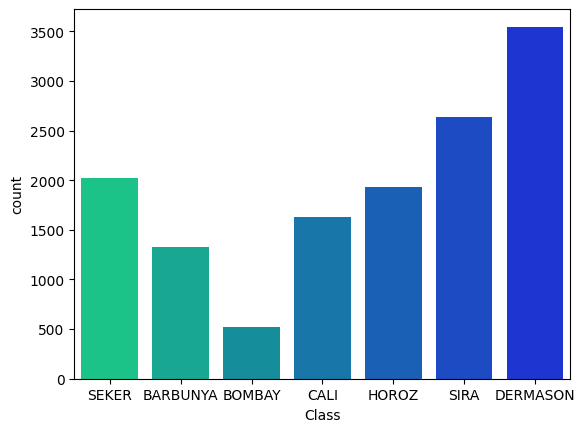

In [24]:
sns.countplot(x='Class',data=dataset,palette="winter_r")

In [62]:
#digunakan untuk menghasilkan ringkasan statistik deskriptif dari dataset yang disimpan dalam variabel `dataset`. 
dataset.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [26]:
# menampilkan ringkasan statistik deskriptif khusus untuk kolom-kolom dengan tipe data objek (nonnumeric)
dataset.describe(include='object')

,Class
count,13611
unique,7
top,DERMASON
freq,3546


In [27]:
# Membuat pembagian antara feature (x) dan target (y)
feature = dataset.drop(columns=['Class'])
target = dataset['Class']
feature

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [28]:
# Membagi dataset menjadi dua bagian, yaitu training dan validasi dengan rasio 80:20
x_train , x_valid , y_train , y_valid = train_test_split(feature , target , test_size=0.2)

MENENTUKAN GEN DAN POPULASI INISIALISASI AWAL

In [29]:
# Disini kita akan mengoptimalkan parameter untuk model Random Forest
# Untuk jumlah populasi, kita akan menetapkan jumlahnya dengan 4 setiap generasi

# Menentukan jumlah pohon
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 4)]
# Menentukan kedalaman maksimal suatu pohon
max_depth = [int(x) for x in np.linspace(10, 1000,4)]

In [30]:
# Membuat variabel populasi awal
population = []
# Menambahkan nilai n_estimators ke dalam variabel populasi
population.append(n_estimators)
# Menambahkan nilai max_depth ke dalam variabel populasi
population.append(max_depth)
# Mengubah tipe variabel menjadi numpy array
population = np.array(population)
# Men-traspose array sehingga bentuknya menjadi array dengan baris sebagai individu (kromosom) dan kolom sebagai parameter
population = np.transpose(population)
population

array([[  10,   10],
       [  40,  340],
       [  70,  670],
       [ 100, 1000]])

MELAKUKAN PENERAPAN ALGORITMA GENETIKA

jumlah data banyak dan jumlah variasi/kolom banyak menyebabkan lamanya proses

In [31]:
# Mengimpor module yang berisi fungsi-fungsi pada algoritma genetika, seperti mating pool, crossover, mutation
import GA

# Menentukan jumlah generasi (loop)
num_generations = 9
# Menentukan jumlah parent setiap populasi
num_parents_mating = 2
# Menentukan ukuran populasi (individu x jumlah parameter)
pop_size = (4,2)

# Membuat 2 variabel untuk menyimpan nilai terbaik dari masing-masing training setiap generasi
train_accuracys = []
valid_accuracys = []

# Fungsi loop untuk algoritma genetika (Best result ditentukan oleh akurasi validasi)
for generation in range(num_generations):
    print("Generation : ", generation+1)

    # Melakukan fitness untuk mencari nilai masing-masing individu
    fitness = GA.cal_pop_fitness(population, x_train, y_train, x_valid, y_valid)

    # Memilih individu terbaik untuk dijadikan parent
    parents = GA.select_mating_pool(population, fitness, 
                                      num_parents_mating)

    # Melakukan crossover atau keturunan dari parent yang dipilih sebelumnya
    offspring_crossover = GA.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], 2))

    # Melakukan mutasi pada individu baru lahir
    offspring_mutation = GA.mutation(offspring_crossover)

    # Membuat populasi baru dengan isi parent dan keturunannya
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring_mutation

    # Mencetak generasi dan individu yang terbaiknya
    print("Best result : ")
    valid_fitness_last = []
    training_fitness_last = []
    for x in range(4):
        model_fit = RandomForestClassifier(n_estimators=population[x][0], 
                                       max_depth=population[x][1])
        model_fit.fit(x_train, y_train)
        valid_accuracy = model_fit.score(x_valid, y_valid)
        train_accuracy = model_fit.score(x_train, y_train)
        valid_fitness_last.append(valid_accuracy)
        training_fitness_last.append(train_accuracy)
    print(np.max(valid_fitness_last))
    train_accuracys.append(np.max(training_fitness_last))
    valid_accuracys.append(np.max(valid_fitness_last))

# Mencetak best fitness dan best generation
best_fitness = np.max(valid_accuracys)
best_generation = np.argmax(valid_accuracys) + 1
print("Best Fitness:", best_fitness)
print("Best Generation:", best_generation)

Generation :  1
Best result : 
0.9247153874403232
Generation :  2
Best result : 
0.9236136614028645
Generation :  3
Best result : 
0.9247153874403232
Generation :  4
Best result : 
0.9247153874403232
Generation :  5
Best result : 
0.9254498714652957
Generation :  6
Best result : 
0.9265515975027543
Generation :  7
Best result : 
0.9243481454278369
Generation :  8
Best result : 
0.9265515975027543
Generation :  9
Best result : 
0.9250826294528094
Best Fitness: 0.9265515975027543
Best Generation: 6


MEMBUAT GRAFIK NILAI KUALITAS TERBAIK (BEST FITNESS) PER GENERASI.

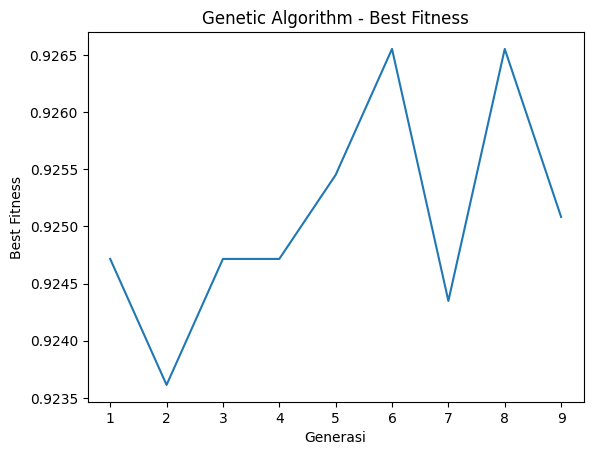

In [32]:
# Membuat array dengan nilai x dari 1 hingga num_generations
generation_numbers = np.arange(1, num_generations+1)
# Menggunakan valid_accuracys sebagai nilai y
best_fitness_values = np.array(valid_accuracys)

# Membuat grafik menggunakan matplotlib
plt.plot(generation_numbers, best_fitness_values)

# Memberi label pada sumbu x dan y serta judul grafik
plt.xlabel('Generasi')
plt.ylabel('Best Fitness')
plt.title('Genetic Algorithm - Best Fitness')

# Menampilkan grafik
plt.show()

MENCARI AKURASI MENGGUNAKAN PARAMETER TERBAIK DARI HASIL ALGORITMA GENETIKA

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_valid = sc.transform(x_valid)

In [34]:
# Mengambil parameter terbaik dari hasil algoritma genetika
best_fitness = np.max(valid_accuracys)
best_generation = np.argmax(valid_accuracys) + 1

In [35]:
# Mengubah y_train dan y_valid ke dalam format one-hot encoding
num_classes = len(np.unique(y_train))
encoder = OneHotEncoder(categories='auto')
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_valid_encoded = encoder.transform(y_valid.values.reshape(-1, 1)).toarray()

 ACTIVATION DIGUNAKAN UNTUK MENGATUR FUNGSI AKTIVASI PADA SETIAP LAYER DALAM MODEL SEQUENTIAL YANG DIBANGUN.

In [36]:
# Membangun model dengan parameter terbaik (fungsi aktivasi)
model = Sequential()
model.add(Dense(256, input_shape=[x_train.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [37]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 139527 (545.03 KB)
Trainable params: 139527 (545.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# FUNGSI LOSS

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
lrd = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=1, factor=0.75, min_lr=1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=100)

In [40]:
# Melatih model dengan parameter terbaik
history = model.fit(x=x_train, y=y_train_encoded, epochs=best_generation, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

Epoch 1/6


307/307 [==============================] - 5s 10ms/step - loss: 0.3248 - accuracy: 0.8846 - val_loss: 0.2035 - val_accuracy: 0.9192 - lr: 0.0010
Epoch 2/6
  1/307 [..............................] - ETA: 3s - loss: 0.1053 - accuracy: 1.0000

c:\Users\Rifdatun Nafi'ah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


307/307 [==============================] - 3s 11ms/step - loss: 0.2262 - accuracy: 0.9185 - val_loss: 0.1988 - val_accuracy: 0.9238 - lr: 0.0010
Epoch 3/6
307/307 [==============================] - 3s 9ms/step - loss: 0.2198 - accuracy: 0.9221 - val_loss: 0.1876 - val_accuracy: 0.9293 - lr: 0.0010
Epoch 4/6
307/307 [==============================] - 1s 4ms/step - loss: 0.2121 - accuracy: 0.9206 - val_loss: 0.1899 - val_accuracy: 0.9376 - lr: 0.0010
Epoch 5/6
307/307 [==============================] - 3s 10ms/step - loss: 0.2054 - accuracy: 0.9257 - val_loss: 0.1812 - val_accuracy: 0.9339 - lr: 0.0010
Epoch 6/6
307/307 [==============================] - 3s 11ms/step - loss: 0.1993 - accuracy: 0.9252 - val_loss: 0.1811 - val_accuracy: 0.9357 - lr: 0.0010


In [41]:
# Evaluasi model pada data latih dan data validasi
scores_train = model.evaluate(x_train, y_train_encoded)
print("Training Accuracy: %.2f%%\n" % (scores_train[1] * 100))
scores_valid = model.evaluate(x_valid, y_valid_encoded)
print("Testing Accuracy: %.2f%%\n" % (scores_valid[1] * 100))

341/341 [==============================] - 1s 4ms/step - loss: 0.1906 - accuracy: 0.9300
Training Accuracy: 93.00%

86/86 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.9251
Testing Accuracy: 92.51%



In [42]:
# Melakukan prediksi pada data validasi
y_pred = np.argmax(model.predict(x_valid), axis=-1)

86/86 [==============================] - 0s 2ms/step


In [43]:
# Menampilkan hasil prediksi dan label aktual
print("Predicted Labels:", y_pred)
print("Actual Labels:", y_valid)

Predicted Labels: [4 5 4 ... 5 0 0]
Actual Labels: 5652        HOROZ
237         SEKER
5641        HOROZ
4525         CALI
6930        HOROZ
           ...   
939         SEKER
10034        SIRA
369         SEKER
2546     BARBUNYA
3117     BARBUNYA
Name: Class, Length: 2723, dtype: object


In [44]:
# Menampilkan prediksi pada contoh data ke-10
print("Prediction for example 10:", y_pred[10])
print("Actual label for example 10:", y_valid.iloc[10])

Prediction for example 10: 3
Actual label for example 10: DERMASON


In [45]:
# Menampilkan evaluasi model pada data validasi secara keseluruhan
evaluations = model.evaluate(x_valid, y_valid_encoded)
print("Evaluation on validation data:", evaluations)

86/86 [==============================] - 1s 6ms/step - loss: 0.2161 - accuracy: 0.9251
Evaluation on validation data: [0.21614713966846466, 0.9250826239585876]


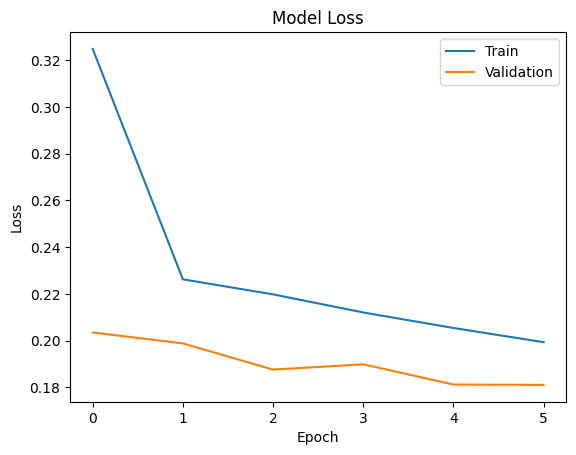

In [46]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

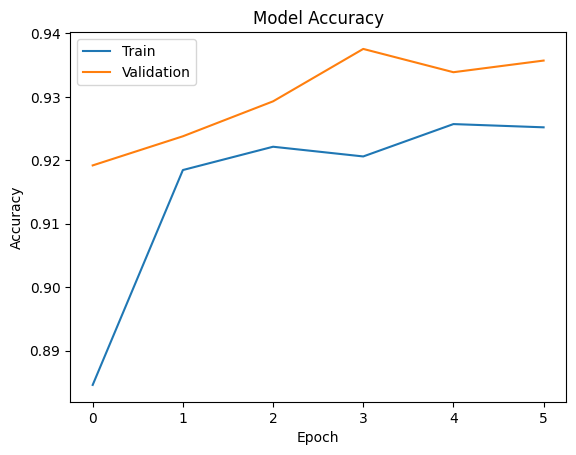

In [47]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
#MATRIKS VALIDATION

from sklearn.preprocessing import LabelEncoder

# Mengonversi label string menjadi angka
label_encoder = LabelEncoder()
y_valid_encoded = label_encoder.fit_transform(y_valid)

# Membuat classification report
report = get_classification_report(y_valid_encoded, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       276
           1       1.00      1.00      1.00        88
           2       0.94      0.91      0.92       322
           3       0.89      0.94      0.92       690
           4       0.98      0.94      0.96       378
           5       0.95      0.96      0.95       452
           6       0.91      0.85      0.88       517

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.92      2723



86/86 [==============================] - 0s 1ms/step


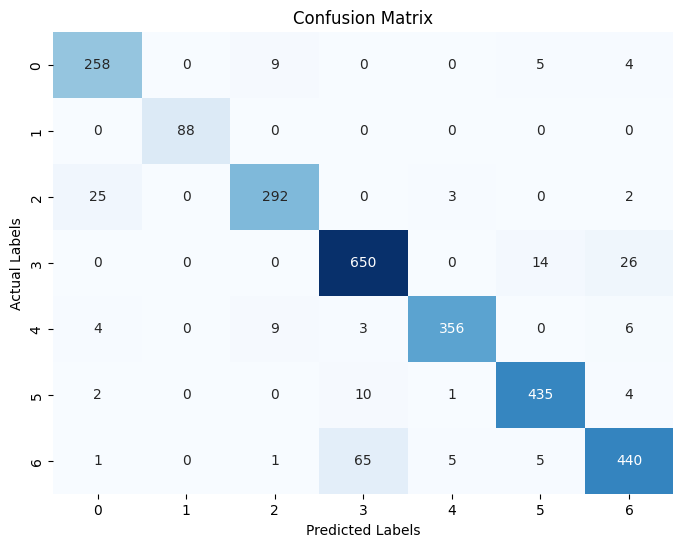

In [61]:
#CONFUSSION MATRIKS

def plot_confusion_matrix(y_true, y_pred):
    # Menghitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Menampilkan confusion matrix dalam bentuk heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

# Mengonversi label string menjadi angka
label_encoder = LabelEncoder()
y_valid_encoded = label_encoder.fit_transform(y_valid)

# penggunaan fungsi
y_pred = model.predict(x_valid)  #hasil prediksi model
y_pred_labels = np.argmax(y_pred, axis=-1)  # pemrosesan label prediksi
plot_confusion_matrix(y_valid_encoded, y_pred_labels)